In [237]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
#importing Dataset
working_directory = '/content/drive/MyDrive/Dataset/Loan Prediction/'
train_df = pd.read_csv(working_directory + 'train_ctrUa4K.csv')

In [85]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [87]:
train_df.shape

(614, 13)

In [88]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True)

In [89]:
train_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [90]:
train_df['Credit_History'].fillna(1.0,inplace=True)

In [91]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [92]:
train_df['Loan_Amount_Term'].fillna(360,inplace=True)

In [93]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [94]:
train_df.shape

(614, 13)

In [95]:
train_df.dropna(inplace=True)

In [96]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [97]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,554.000000,554.000000,554.000000,554.000000,554.000000
mean,5267.059567,1585.575668,144.969009,342.346570,0.855596
std,5455.163295,2524.484889,81.078416,64.781026,0.351817
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3839.500000,1149.000000,128.000000,360.000000,1.000000
75%,5818.750000,2297.250000,166.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


In [98]:
numeric_features=train_df.describe().columns

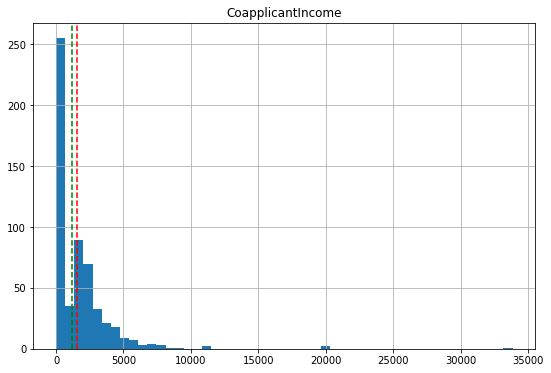

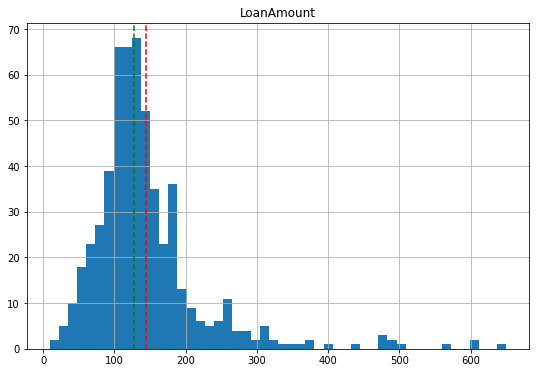

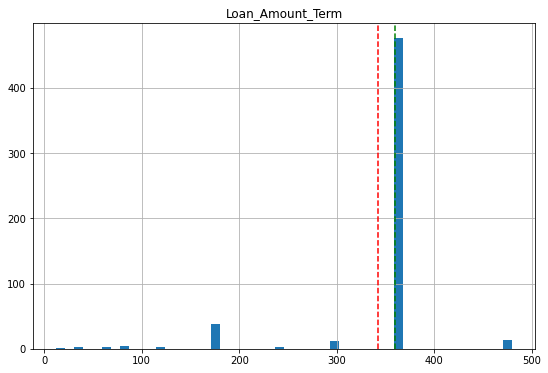

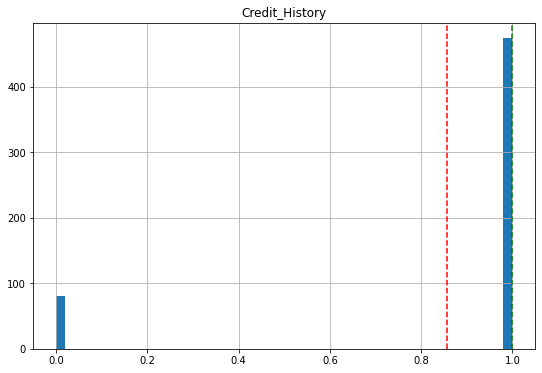

In [99]:
for col in numeric_features[1:]:
  fig= plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=train_df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(),color='red',linestyle='dashed')
  ax.axvline(feature.median(),color='green',linestyle='dashed')
  ax.set_title(col)
plt.show()  

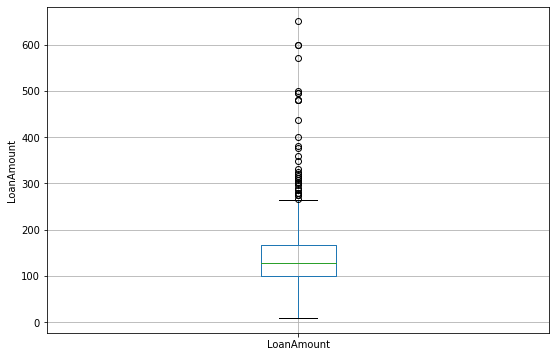

In [100]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
train_df.boxplot(column = 'LoanAmount')
ax.set_ylabel("LoanAmount")
plt.show()


In [101]:
upper_boundry=train_df['LoanAmount'].mean() + 3*train_df['LoanAmount'].std()
lower_boundry=train_df['LoanAmount'].mean() - 3*train_df['LoanAmount'].std()
print(lower_boundry), print(upper_boundry)

-98.26623821103775
388.2042565542906


(None, None)

In [102]:
IQR= train_df['LoanAmount'].quantile(0.75)-train_df['LoanAmount'].quantile(0.25)

In [103]:
lower_bridge=train_df['LoanAmount'].quantile(0.25)-3*IQR
upper_bridge=train_df['LoanAmount'].quantile(0.75)+3*IQR
print(lower_bridge),print(upper_bridge)

-100.25
367.0


(None, None)

In [104]:
train=train_df.copy()

In [105]:
train.loc[train['LoanAmount']>398,'LoanAmount']=398

In [106]:
IQR= train_df['ApplicantIncome'].quantile(0.75)-train_df['ApplicantIncome'].quantile(0.25)

In [107]:
lower_bridge=train_df['ApplicantIncome'].quantile(0.25)-3*IQR
upper_bridge=train_df['ApplicantIncome'].quantile(0.75)+3*IQR
print(lower_bridge),print(upper_bridge)

-6081.25
14743.75


(None, None)

In [108]:
train.loc[train['ApplicantIncome']>14547,'ApplicantIncome']=14547

In [109]:
IQR= train_df['CoapplicantIncome'].quantile(0.75)-train_df['CoapplicantIncome'].quantile(0.25)

In [110]:
lower_bridge=train_df['CoapplicantIncome'].quantile(0.25)-3*IQR
upper_bridge=train_df['CoapplicantIncome'].quantile(0.75)+3*IQR
print(lower_bridge),print(upper_bridge)


-6891.75
9189.0


(None, None)

In [111]:
train.loc[train['CoapplicantIncome']>9189,'CoapplicantIncome']=9189

In [112]:
upper_boundry=train_df['Loan_Amount_Term'].mean() + 3*train_df['Loan_Amount_Term'].std()
lower_boundry=train_df['Loan_Amount_Term'].mean() - 3*train_df['Loan_Amount_Term'].std()
print(lower_boundry), print(upper_boundry)

148.0034931002214
536.6896476940025


(None, None)

In [113]:
train.loc[train['Loan_Amount_Term']<149,'Loan_Amount_Term']=149

In [114]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [115]:
train['Gender'].value_counts()

Male      453
Female    101
Name: Gender, dtype: int64

In [116]:
train['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [117]:
train['Married'].replace({'Yes':1,'No':0},inplace=True)

In [118]:
train['Education'].value_counts()

Graduate        431
Not Graduate    123
Name: Education, dtype: int64

In [119]:
train['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)

In [120]:
train['Self_Employed'].value_counts()

No     478
Yes     76
Name: Self_Employed, dtype: int64

In [121]:
train['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [122]:
train['Property_Area'].value_counts()

Semiurban    211
Urban        180
Rural        163
Name: Property_Area, dtype: int64

In [123]:
Property_Area= train[["Property_Area"]]

Property_Area = pd.get_dummies(Property_Area, drop_first= True)

In [124]:
train['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [125]:
data_train=pd.concat([train,Property_Area],axis=1)

In [126]:
data_train.drop(['Property_Area','Loan_ID'],axis=1,inplace=True)

In [127]:
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,1


In [128]:
from sklearn.model_selection import train_test_split


In [129]:
data_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [130]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   554 non-null    int64  
 1   Married                  554 non-null    int64  
 2   Dependents               554 non-null    object 
 3   Education                554 non-null    int64  
 4   Self_Employed            554 non-null    int64  
 5   ApplicantIncome          554 non-null    int64  
 6   CoapplicantIncome        554 non-null    float64
 7   LoanAmount               554 non-null    float64
 8   Loan_Amount_Term         554 non-null    float64
 9   Credit_History           554 non-null    float64
 10  Loan_Status              554 non-null    int64  
 11  Property_Area_Semiurban  554 non-null    uint8  
 12  Property_Area_Urban      554 non-null    uint8  
dtypes: float64(4), int64(6), object(1), uint8(2)
memory usage: 53.0+ KB


In [131]:
X=data_train.loc[:,['Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Semiurban', 'Property_Area_Urban']]

In [132]:
y=data_train.loc[:,['Loan_Status']]

In [133]:
X.dtypes

Gender                       int64
Married                      int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

**Prediction by using Logistic Regression**

In [135]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
y_pred=clf.predict(X_test)
y_pred1=clf.predict_proba(X_test)

In [137]:
from sklearn.metrics import accuracy_score,roc_auc_score
print('Accuracy Score= {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score= {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy Score= 0.7747747747747747
roc_auc_score= 0.6762962962962963


**#Random Forest Classifier**

In [138]:

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)
print('Accuracy Score= {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score= {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy Score= 0.7477477477477478
roc_auc_score= 0.7129629629629631


**Hyperparameter Tunning**

In [140]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [61]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,n_iter=100,verbose=2,
                               random_state=100)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1000, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1000, criterion=entropy, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1000, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1000, criterion=entropy, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1000, criterion=entropy 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1000, criterion=entropy, total=   0.3s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=120, criterion=gini 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=120, criterion=gini, total=   2.1s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=120, criterion=gini 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=120, criterion=gini, total=   2.0s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=120, criterion=gini 
[CV]  n_est

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  8.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [62]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 14,
 'n_estimators': 200}

In [239]:
# Fitting Random Forest by best parameter 

In [141]:
model_1=RandomForestClassifier(criterion='entropy',max_depth=670,max_features='log2',min_samples_leaf=6,min_samples_split=10,n_estimators=2000)

In [142]:
model_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=670, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [143]:
final_model=model_1.fit(X,y)

In [144]:
model_1.score(X_test,y_test)

0.7747747747747747

In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model_1.predict(X_test))

array([[13, 23],
       [ 2, 73]])

**Classification Report**

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.36      0.51        36
           1       0.76      0.97      0.85        75

    accuracy                           0.77       111
   macro avg       0.81      0.67      0.68       111
weighted avg       0.79      0.77      0.74       111



**Prediction by using Support vector algorithm**

In [147]:
from sklearn.svm import SVC
clf_1=SVC()
clf_1.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [148]:
clf_1.score(X_test,y_test)

0.6756756756756757

**#TEST DATA**

In [150]:
working_directory = '/content/drive/MyDrive/Dataset/Loan Prediction/'
test_df = pd.read_csv(working_directory + 'test_lAUu6dG.csv')

In [151]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [152]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [153]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [154]:
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)
test_df['Credit_History'].fillna(1.0,inplace=True)
test_df['Loan_Amount_Term'].fillna(360,inplace=True)
test_df.dropna(inplace=True)

In [155]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [156]:
test_df.loc[test_df['LoanAmount']>398,'LoanAmount']=398
test_df.loc[test_df['ApplicantIncome']>14547,'ApplicantIncome']=14547
test_df.loc[test_df['CoapplicantIncome']>9189,'CoapplicantIncome']=9189
test_df.loc[test_df['Loan_Amount_Term']<149,'Loan_Amount_Term']=149
test_df['Gender'].replace({'Male':1,'Female':0},inplace=True)
test_df['Married'].replace({'Yes':1,'No':0},inplace=True)
test_df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
test_df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
Property_Area=test_df[["Property_Area"]]

Property_Area = pd.get_dummies(Property_Area, drop_first= True)

data_test=pd.concat([test_df,Property_Area],axis=1)
data_test.drop(['Property_Area','Loan_ID','Dependents'],axis=1,inplace=True)

In [157]:
data_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,1,1,1,0,5720,0,110.0,360.0,1.0,0,1
1,1,1,1,0,3076,1500,126.0,360.0,1.0,0,1
2,1,1,1,0,5000,1800,208.0,360.0,1.0,0,1
3,1,1,1,0,2340,2546,100.0,360.0,1.0,0,1
4,1,0,0,0,3276,0,78.0,360.0,1.0,0,1


In [158]:
final_pred=model_1.predict(data_test)

In [159]:
pred=pd.DataFrame(final_pred)
working_directory = '/content/drive/MyDrive/Dataset/Loan Prediction/'
sub = pd.read_csv(working_directory + 'sample_submission_49d68Cx.csv')
datasets=pd.concat([sub['Loan_ID'],pred],axis=1)
datasets.columns=["Loan_ID","Loan_Status"]
datasets.to_csv('sample_sub_1.csv',index=False)